In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from WelfareMeasures import *
from functions_njit import tax_rate_fct
from bernoulli_distribution import Bernoulli
from help_functions_non_njit import *
# load local model file and initialize model class
from model import ModelClass
from scipy.optimize import minimize

# Load original model

In [2]:
model = ModelClass() # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim
par.opt_tol = 1e-6
par.opt_maxiter = 1000

%time model.solve(do_print=False)
%time model.simulate()

CPU times: total: 3min 56s
Wall time: 1min 5s
CPU times: total: 39.1 s
Wall time: 32.8 s


# Optimal retirement payments according to welfare conditioning on pension being the same

In [18]:
def objective_func(tau_values, model):
    time = np.arange(par.T)

    constant, beta1, beta2 = tau_values

    tau = np.maximum((constant + beta1*time + beta2*time**2) / 100, 0)

    theta = [tau]
    theta_names = ['tau']

    og_model, new_model =  make_new_model(model, theta, theta_names, do_print = False)

    consumption_eq = find_consumption_equivalence(og_model, new_model, do_print= False, the_method = 'brentq')

    if np.mean(og_model.sim.s[:, 35]) >= np.mean(new_model.sim.s[:, 35]):
        print("Og is larger, value is", np.mean(og_model.sim.s[:, 35]) - np.mean(new_model.sim.s[:, 35]))

    diff = np.maximum(np.mean(og_model.sim.s[:, 35]) - np.mean(new_model.sim.s[:, 35]), 0)


    print(consumption_eq, diff, tau_values)
    return - consumption_eq + diff

tau_values_init = np.array([6.01024979e+00, 5.00000000e-01, 1.31046423e-04])

bounds  = [(0,  30), 
           (-1.0,  1.0), 
           (-0.005,  0.005)]

res = minimize(objective_func, tau_values_init, args=(model, ),  
               method='nelder-mead', 
               bounds=bounds,
               options={'maxiter': 500})

print(res.x)

0.02555410436019156 0.0 [6.01024979e+00 5.00000000e-01 1.31046423e-04]
0.02401474985482606 0.0 [6.31076228e+00 5.00000000e-01 1.31046423e-04]
0.024098951390360113 0.0 [6.01024979e+00 5.25000000e-01 1.31046423e-04]
Og is larger, value is 29.173029058147222
0.025525958275519338 29.173029058147222 [6.01024979e+00 5.00000000e-01 1.37598744e-04]
0.022937266099755906 0.0 [6.21059145e+00 5.16666667e-01 1.24494102e-04]
0.024172731715865876 0.0 [6.16050603e+00 5.12500000e-01 1.27770262e-04]
0.02494858733448369 0.0 [5.80990813e+00 5.25000000e-01 1.28862316e-04]
Og is larger, value is 1604.7417272320017
0.025463759407516894 1604.7417272320017 [5.97685951e+00 5.00000000e-01 1.27406245e-04]
0.024474359673067787 0.0 [6.00190222e+00 5.18750000e-01 1.30136378e-04]
Og is larger, value is 3915.8273373325355
0.025838401025238544 3915.8273373325355 [5.72086739e+00 5.16666667e-01 1.32259816e-04]
0.024547561489130083 0.0 [6.05059637e+00 5.13541667e-01 1.28892651e-04]
0.02558110120311588 0.0 [5.91193398e+00 

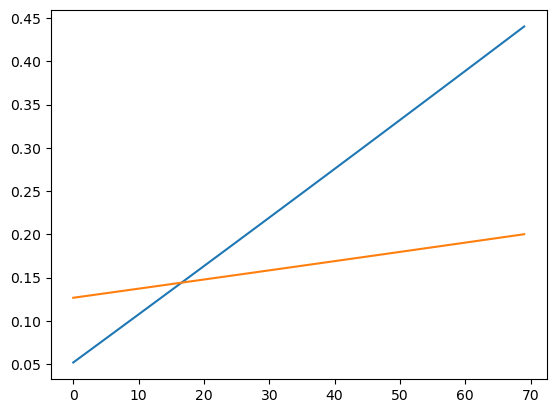

In [20]:
# constant, beta1, beta2 = np.array([ 1.46922503e+01, -2.31206543e-02,  6.27520107e-04]) # Current optimal giving 0.0065521344388923845 consumption eq.
# constant, beta1, beta2 = np.array([0.12660593088229844, 0.0010516612509233273, 2.0202759701588496e-7]) * 100
constant, beta1, beta2 = np.array([5.17959452e+00, 5.54957733e-01, 1.15837720e-04])


time = np.arange(par.T)

tau = np.maximum((constant + beta1*time + beta2*time**2) / 100, 0)

plt.plot(tau)
plt.plot(par.tau)
plt.show()


In [ ]:
theta = [tau]
theta_names = ['tau']

og_model, new_model =  make_new_model(model, theta, theta_names, do_print = False)